In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
from PIL import Image
import torch
from torchvision import transforms

%matplotlib inline
import matplotlib.pyplot as plt

#  Holistically-Nested Edge Detection
Clone [https://github.com/sniklaus/pytorch-hed](https://github.com/sniklaus/pytorch-hed) by [Simon Niklaus](https://github.com/sniklaus) and replace pytorch-hed/run.py with the one provided by us.


Credits to *Holistically-Nested Edge Detection* by Saining Xie and Zhuowen Tu (2015). Check https://arxiv.org/abs/1504.06375](https://arxiv.org/abs/1504.06375).

In [ ]:
!git clone https://github.com/sniklaus/pytorch-hed

Cloning into 'pytorch-hed'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 86 (delta 0), reused 1 (delta 0), pack-reused 83
Unpacking objects: 100% (86/86), done.


In [ ]:
!python /content/pytorch-hed/run.py

['Drawings']
Drawings
/content/gdrive/MyDrive/VanGoghGAN_Landscapes/Dataset/Drawings/Originals/A Corner of the Asylum and the Garden with a Heavy, Sawn-Off Tree.jpg
Downloading: "http://content.sniklaus.com/github/pytorch-hed/network-bsds500.pytorch" to /root/.cache/torch/hub/checkpoints/hed-bsds500
100% 56.1M/56.1M [00:03<00:00, 15.0MB/s]
/content/gdrive/MyDrive/VanGoghGAN_Landscapes/Dataset/Drawings/Originals/A Group of Pine Trees near a House.jpg
/content/gdrive/MyDrive/VanGoghGAN_Landscapes/Dataset/Drawings/Originals/Avenue of Poplars.jpg
/content/gdrive/MyDrive/VanGoghGAN_Landscapes/Dataset/Drawings/Originals/A Row of Bare Trees.jpg
/content/gdrive/MyDrive/VanGoghGAN_Landscapes/Dataset/Drawings/Originals/Barn with Moss-Grown Roof.jpg
/content/gdrive/MyDrive/VanGoghGAN_Landscapes/Dataset/Drawings/Originals/Arums.jpg
/content/gdrive/MyDrive/VanGoghGAN_Landscapes/Dataset/Drawings/Originals/A Garden with Flowers.jpg
/content/gdrive/MyDrive/VanGoghGAN_Landscapes/Dataset/Drawings/Origin

## Preprocessing and preparing tensors

In [3]:
PATH = '/content/gdrive/MyDrive/VanGoghGAN_Landscapes/Dataset'

In [4]:
def preprocess_image(image_name):
  transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(256),
            transforms.ToTensor()
  ])
  image = Image.open(image_name)
  image = transform(image).float()
  return image

In [5]:
# Linear rescale to range [-1, 1]

def scale_minus1_1(x):
  return 2*x - 1

In [6]:
# Linear rescale to range [0, 1]

def scale_0_1(x):
  return (x+1)/2

In [7]:
PATH = '/content/gdrive/MyDrive/VanGoghGAN_Landscapes/Dataset'

#folders = sorted(os.listdir(PATH))
folders = ['Boudin', 'Caillebotte', 'Cezanne', 'Chase', 'Drawings', 'Gauguin', 'Gorbatov', 'Guillaumin', 'Hassam', 'Korovin', 'Loiseau', 'Martin', 'Maufra', 'Metcalf', 'Monet', 'Pissarro', 'Renoir', 'Robinson', 'Rose', 'Sisley', 'Thaulow', 'Twachtman', 'Van Gogh', 'Weir']
print(folders)

for folder in folders:
  print(folder)
  hed_dataset = torch.empty(len(os.listdir(PATH+'/'+folder+'/HED')), 3, 256, 256, dtype=torch.float)
  for (i,image) in enumerate(os.listdir(PATH+'/'+folder+'/Originals')):
    print(str(i) + ': ' + image)
    hed_dataset[i] = scale_minus1_1(preprocess_image(PATH+'/'+folder+'/HED/'+image[:-4]+' HED.jpg'))
  torch.save(hed_dataset, PATH+'/'+folder+' HED.pt')

['Drawings']
Drawings
0: A Corner of the Asylum and the Garden with a Heavy, Sawn-Off Tree.jpg
1: A Group of Pine Trees near a House.jpg
2: Avenue of Poplars.jpg
3: A Row of Bare Trees.jpg
4: Barn with Moss-Grown Roof.jpg
5: Arums.jpg
6: A Garden with Flowers.jpg
7: Fields with Poppies.jpg
8: Garden of the Asylum.jpg
9: Field with Flowers.jpg
10: Cypresses with Two Women in the Foreground.jpg
11: Farmhouse with Wheat Field along a Road.jpg
12: Enclosed Field 2.jpg
13: Entrance Gate to a Farm with Haystacks.jpg
14: Bush in the Park at Arles The Poet s Garden II.jpg
15: Enclosed Field behind Saint-Paul Hospital.jpg
16: Enclosed Field 3.jpg
17: Cypresses.jpg
18: Drawbridge with Lady with Parasol.jpg
19: Field with Bare Tree.jpg
20: Enclosed Field.jpg
21: Cypresses 2.jpg
22: Field of Grass with a Round Clipped Shrub.jpg
23: Field with Thunderstorm.jpg
24: Enclosed Field 4.jpg
25: Country Road.jpg
26: Enclosed Field 5.jpg
27: Cottages and Trees.jpg
28: Enclosed Wheat Field with Reaper.jpg
2

torch.Size([3, 256, 256])


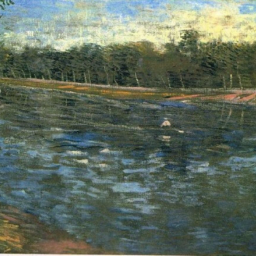

torch.Size([3, 256, 256])


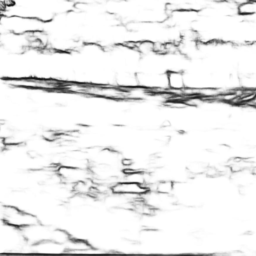

In [ ]:
elem = 0

original_dataset = torch.load(PATH+'/'+'Van Gogh Originals.pt')
print(original_dataset[elem].shape)
display(transforms.ToPILImage()(scale_0_1(original_dataset[elem])).convert('RGB'))

hed_dataset = -torch.load(PATH+'/'+'Van Gogh HED.pt')
print(hed_dataset[elem].shape)
display(transforms.ToPILImage()(scale_0_1(hed_dataset[elem])).convert('RGB'))